Quantum Circuit for Closest Pattern Matching with particular set of strings

References: 
1)A Quantum Algorithm for Closest Pattern Matching by P Mateus and Y Omar
2)Grover Circuit Building (Oracle + Amplitude Amplification) https://community.qiskit.org/textbook/ch-algorithms/grover.html

In [29]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute
import math
import numpy as np
import matplotlib.pyplot as plt
from qiskit.tools.visualization import plot_histogram

In [31]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = provider.get_backend('ibmq_16_melbourne')

/usr/local/lib/python3.6/dist-packages/qiskit/providers/ibmq/ibmqfactory.py:181: UserWarning: Credentials are already in use. The existing account in the session will be replaced.
  warnings.warn('Credentials are already in use. The existing '


In [2]:
def initialize(q,circuit):
    circuit.h(q[0])
    circuit.h(q[1])
    
    circuit.cx(q[0],q[2])
    circuit.cx(q[1],q[3])
    
    circuit.x(q[0])
    circuit.x(q[1])
    circuit.cx(q[1],q[3])
    circuit.x(q[1])
    
    circuit.ccx(q[0],q[1],q[2])
    circuit.ccx(q[0],q[1],q[3])
    
    circuit.x(q[0])
    circuit.barrier()

In [4]:
def amplitude_amp(q,a,circuit):
    for i in range(4):
        circuit.h(q[i])
        circuit.x(q[i])
    circuit.barrier()
    
    circuit.h(q[3])
    
    circuit.ccx(q[0],q[1],a[0])
    circuit.ccx(q[2],a[0],a[1])
    circuit.cx(a[1],q[3])
    circuit.ccx(q[2],a[0],a[1])
    circuit.ccx(q[0],q[1],a[0])
    
    circuit.h(q[3])
    
    circuit.barrier()
    for i in range(4):
        circuit.h(q[i])
        circuit.x(q[i])
    circuit.barrier()

In [3]:
def grover(q,a,circuit):
    circuit.cz(q[1],q[0])
    circuit.cz(q[3],q[0])
    circuit.barrier()
    
    amplitude_amp(q,a,circuit)
    
    circuit.cz(q[2],q[0])
    circuit.barrier()
    amplitude_amp(q,a,circuit)

In [12]:
def measure(q,c,circuit):
    circuit.measure(q,c)

In [26]:
def run_qcircuit(circuit):
    backend = Aer.get_backend('qasm_simulator')
    job = execute(circuit,backend,shots=1024)
    result = job.result()
    counts = result.get_counts()
    for c in counts:
        print(c,counts[c])
    plot_histogram(counts)

In [22]:
q = QuantumRegister(4)
a = QuantumRegister(2)
c = ClassicalRegister(4)
circuit = QuantumCircuit(q,a,c)

In [23]:
initialize(q,circuit)
grover(q,a,circuit)
measure(q,c,circuit)
circuit.draw()

0110 15
0010 165
1111 21
0111 16
0011 132
1101 135
0001 13
0000 18
1110 15
1001 125
0101 147
1000 11
0100 15
1011 13
1100 168
1010 15


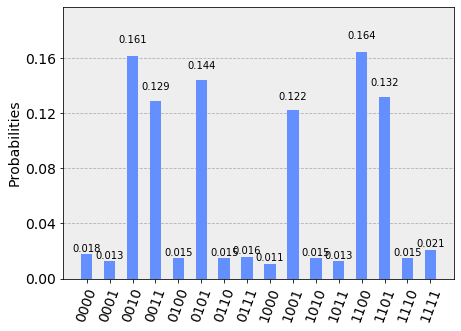

In [28]:
#backend = Aer.get_backend('qasm_simulator')
job = execute(circuit,backend,shots=1024)
result = job.result()
counts = result.get_counts()
for c in counts:
    print(c,counts[c])
plot_histogram(counts)